Import libraries.

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

Load the data.

In [2]:
data = np.load("../Mock_Data/dataset_all_H1_bootstrap_O3a.npy")
data_length = len(data)
data_length

37800

Turn on the pyplot interaction mode.

In [46]:
plt.ion()

In [4]:
x = np.arange(data_length)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


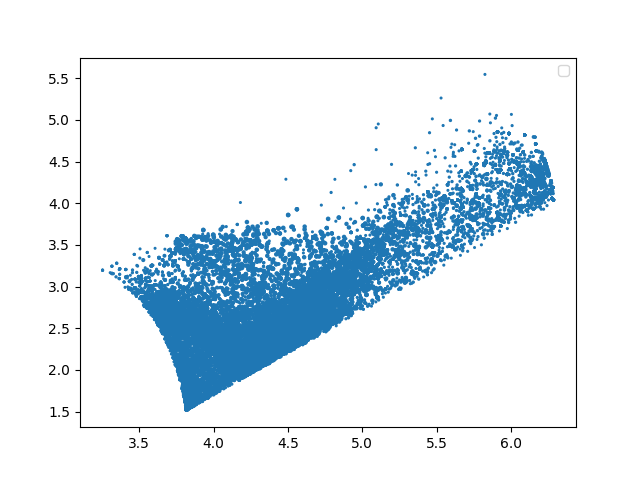

In [5]:
fig, ax = plt.subplots()
# ax.plot(x, data[:,0], label='SNR')
# ax.plot(x, data[:,1], label='Chisq')
# ax.plot(x, data[:,2], label='Mass1')
# ax.plot(x, data[:,3], label='Mass2')
# ax.plot(x, data[:,4], label='Spin1z')
# ax.plot(x, data[:,5], label='Spin2z')
# ax.plot(x, data[:,6], label='Class')

x = np.log(data[:,2])
y = np.log(data[:,3])
snr = np.log(data[:,0])

ax.scatter(x,y,s=snr)

ax.legend()

Now, plot the real data.

In [6]:
data_H1_O3a = np.load("../data/dataset_all_H1_bootstrap_O3a.npy")
data_H1_O3b = np.load("../data/dataset_all_H1_bootstrap_O3a.npy")
data_L1_O3a = np.load("../data/dataset_all_H1_bootstrap_O3a.npy")
data_L1_O3b = np.load("../data/dataset_all_H1_bootstrap_O3a.npy")
data_V1_O3a = np.load("../data/dataset_all_H1_bootstrap_O3a.npy")
data_V1_O3b = np.load("../data/dataset_all_H1_bootstrap_O3a.npy")

In [7]:
#data_length

In [1]:
import torch
torch.cuda.is_available()

True

In [3]:
import numpy as np
data_a = np.load("../data/dataset_all_H1_bootstrap_O3a.npy")
data_b = np.load("../data/dataset_all_H1_bootstrap_O3b.npy")


In [4]:
len(data_a)

37800

In [5]:

total = np.vstack([data_a,data_b])
len(total)

75600

In [6]:
total[0,:]

array([ 9.25442013e+00,  7.83195005e+00,  3.85520985e+02,  4.35515753e+01,
        1.70023606e-01, -2.26552595e-01,  3.00000000e+00])

In [7]:
import pandas as pd

pd.DataFrame(total)

,0,1,2,3,4,5,6
0,9.254420,7.831950,385.520985,43.551575,0.170024,-0.226553,3.0
1,4.918122,1.049978,244.809516,79.182049,0.563761,0.184612,0.0
2,5.831387,1.394088,105.503126,11.895160,-0.499879,0.283521,0.0
3,5.171994,1.100152,72.932770,11.926752,0.750677,-0.290788,3.0
4,5.270617,1.455858,73.913381,16.359395,0.543106,-0.148996,0.0
...,...,...,...,...,...,...,...
75595,23.099025,39.565564,91.711134,9.598615,-0.543590,0.430138,4.0
75596,18.977332,26.400047,167.938280,36.568601,-0.208704,0.199369,2.0
75597,45.583568,58.212200,64.404370,34.368289,-0.255531,-0.479915,1.0
75598,4.319583,0.991927,92.770109,17.860022,-0.136445,0.002160,0.0


In [8]:
np.random.shuffle(total)
pd.DataFrame(total)

,0,1,2,3,4,5,6
0,77.697843,125.857072,73.269320,8.563697,-0.822103,-0.634340,2.0
1,9.947087,5.589723,64.289049,13.634461,0.582709,-0.031393,3.0
2,7.328095,1.539044,60.352607,13.640120,-0.935977,-0.752299,1.0
3,6.497404,1.514430,75.422021,8.549992,-0.513983,-0.023874,1.0
4,109.802325,425.821707,110.752792,19.298668,-0.701955,0.289464,2.0
...,...,...,...,...,...,...,...
75595,7.332636,2.268617,196.312609,30.448710,-0.194367,-0.238589,6.0
75596,6.909340,2.829186,373.083311,45.192903,0.227709,-0.283280,6.0
75597,4.529793,1.091873,132.723990,16.340892,-0.185205,0.823508,0.0
75598,4.075017,0.699938,46.210991,6.958595,0.939770,-0.611160,3.0


In [9]:
data_length = len(total)
data_length

75600

In [10]:
training_set_length = int(data_length * 0.7)
validating_set_length = int(data_length * 0.2)
testing_set_length = data_length - training_set_length - validating_set_length

In [11]:
training_set = total[0:training_set_length,:]
validating_set = total[training_set_length:training_set_length + validating_set_length,:]
testing_set = total[training_set_length + validating_set_length:,:]

len(training_set) + len(validating_set) + len(testing_set)

75600

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [14]:
training_set_A = training_set[:,0:6]
training_set_B = training_set[:,6]
input_tensor = torch.tensor(training_set_A, dtype=torch.float32).to(device)
label_tensor = torch.tensor(training_set_B, dtype=torch.int64).to(device)

input_val_tensor = torch.tensor(validating_set[:,0:6], dtype=torch.float32).to(device)
label_val_tensor = torch.tensor(validating_set[:,6], dtype=torch.int64).to(device)

input_test_tensor = torch.tensor(testing_set[:,0:6], dtype=torch.float32).to(device)
label_test_tensor = torch.tensor(testing_set[:,6], dtype=torch.int64).to(device)

dataset = TensorDataset(input_tensor, label_tensor)
dataset_val = TensorDataset(input_val_tensor, label_val_tensor)
dataset_test = TensorDataset(input_test_tensor, label_test_tensor)

train_loader = DataLoader(dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset_val, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset_test, batch_size=32, shuffle=True)

Define the model

In [ ]:
del(model)

NameError: name 'model' is not defined

In [13]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(6, 128)
        self.fc2 = nn.Linear(128,256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 7)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [39]:
from tqdm import tqdm

In [76]:
model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.002)

loss_average_list = []
accuracy_average_list = []

for epoch in tqdm(range(100), desc="Training ..."):

    correct_predictions = 0 
    total_samples = 0   
    loss_array = []
    for data in train_loader:
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print(f'Epoch [{epoch+1}/{epoch}], Loss: {loss.item():.4f}')
        loss_array.append(loss.item())
        loss_average = sum(loss_array)/len(loss_array)
        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    loss_average_list.append(loss_average)

    accuracy_average = correct_predictions / total_samples
    accuracy_average_list.append(accuracy_average)



Training ...:   0%|          | 0/100 [00:00<?, ?it/s]

Training ...: 100%|██████████| 100/100 [05:06<00:00,  3.06s/it]


In [77]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

In [78]:
loss_average_list

[1.03362034430599,
 0.7877106841342769,
 0.6922505898840338,
 0.6488737697198429,
 0.6202954085861325,
 0.5864490074485071,
 0.5640474627066985,
 0.5448834360492705,
 0.5315360618798015,
 0.5288906342281252,
 0.5183174448063036,
 0.5057129294599126,
 0.4949097029297211,
 0.4895447380435366,
 0.49110386131428174,
 0.47569153352022314,
 0.4731892123593168,
 0.4705347640770955,
 0.45806414934445033,
 0.45746456213214376,
 0.4505512819297729,
 0.4584329797060847,
 0.44177693697064213,
 0.44257537649433154,
 0.4361063492593627,
 0.4299116754834568,
 0.44259536313625025,
 0.43029805523272435,
 0.4293058926719348,
 0.42453774315234105,
 0.43163969047917133,
 0.4219195915266709,
 0.4207137653845145,
 0.4109740082124989,
 0.41606048096372256,
 0.4211381853725919,
 0.412852321838129,
 0.4129851788210321,
 0.40623038608531276,
 0.4076297133755583,
 0.4047630217665088,
 0.4106803912142384,
 0.4148528919416731,
 0.4060571108918813,
 0.39930592866067155,
 0.3967138829459735,
 0.3960238673973112,
 0.

In [79]:
accuracy_average_list

[0.6244708994708995,
 0.7002078609221466,
 0.7292517006802721,
 0.7473167044595616,
 0.7597694633408919,
 0.7725812547241119,
 0.7812925170068027,
 0.7888888888888889,
 0.7911375661375661,
 0.7952003023431595,
 0.7980914588057445,
 0.8011526832955405,
 0.8040060468631898,
 0.804875283446712,
 0.8081254724111867,
 0.8125472411186697,
 0.8118669690098261,
 0.814474678760393,
 0.8177626606198035,
 0.8180083144368858,
 0.8205782312925171,
 0.818764172335601,
 0.8236583522297808,
 0.8229402872260015,
 0.8271730914588058,
 0.8268518518518518,
 0.8264361300075586,
 0.8267573696145125,
 0.827891156462585,
 0.8301020408163265,
 0.8277021919879063,
 0.8305933484504913,
 0.8321050642479214,
 0.8356953892668179,
 0.8338057445200302,
 0.832312925170068,
 0.8342592592592593,
 0.8346749811035525,
 0.8379062736205594,
 0.835525321239607,
 0.8378684807256236,
 0.8370181405895691,
 0.8356198034769463,
 0.8352985638699925,
 0.840098261526833,
 0.8398526077097506,
 0.8407974300831443,
 0.8393990929705215,

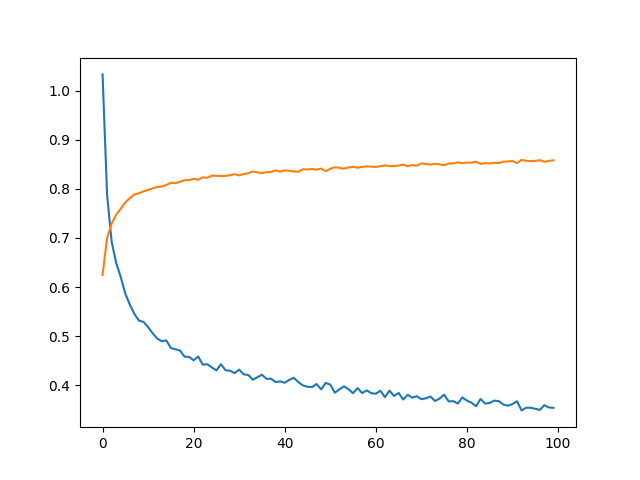

In [84]:
fig, ax = plt.subplots()

ax.plot(loss_average_list)

ax.plot(accuracy_average_list)

In [85]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

In [86]:
model.eval()
all_predictions = []
all_labels = []

In [87]:
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

Calculate accuracy

In [88]:
accuracy = accuracy_score(all_labels, all_predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8483465608465608


In [ ]:
print(classification_report(all_labels, all_predictions))

              precision    recall  f1-score   support

           0       0.58      0.88      0.70      2160
           1       0.90      0.90      0.90      2207
           2       0.90      0.96      0.93      2183
           3       0.96      0.42      0.58      2172
           4       0.93      0.98      0.96      2110
           5       0.85      0.80      0.83      2137
           6       0.96      0.96      0.96      2151

    accuracy                           0.84     15120
   macro avg       0.87      0.84      0.84     15120
weighted avg       0.87      0.84      0.84     15120



In [ ]:
print(confusion_matrix(all_labels, all_predictions))

[[1903   18   39   21   55   87   37]
 [  58 1977   57    1   13  100    1]
 [  10   21 2086    2   54    4    6]
 [1109   13   12  906    7  101   24]
 [   7    0   32    0 2061    0   10]
 [ 215  169   15   11    3 1720    4]
 [   0    0   75    0   12    0 2064]]


Save the model

In [ ]:
torch.save(model.state_dict(),"../models/model2312082058local")

Load the model

In [ ]:
model = Net().to(device)
model.load_state_dict(torch.load("../models/model2312082058local"))

<All keys matched successfully>